##Assignment #5: Comparative Analysis

Description: For a given dataset, implement and compare classification (e.g., Logistic Regression) and clustering techniques (e.g., K-Means) and provide a summary of when to use each approach.


Problem Statement

"Can we predict whether a passenger survived the Titanic disaster based on their characteristics? Furthermore, can we uncover meaningful groupings of passengers using clustering techniques?"

Two-Part Homework Breakdown
Part 1: Classification Problem

Goal: Predict survival (Survived: 0 or 1)

Approach: Use Logistic Regression and compare it with another classifier if desired.

Target Variable: survived

Features: sex, age, fare, class, etc.

Part 2: Clustering Problem

Goal: Group passengers into clusters without using the survival label.

Approach: Use K-Means clustering based on features like age, fare, class, and gender (converted to numeric).

Target: None — clustering is unsupervised. We'll explore whether clusters correspond meaningfully to survival outcomes or passenger types (e.g., crew vs wealthy vs steerage class).

In [ ]:
!pip -q install --upgrade pip
!pip -q install scikit-learn==1.4.2 mlflow pandas numpy matplotlib seaborn
# this will give errors however ok to proceed

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")


In [ ]:
# Quick inspect
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#Data Cleaning
Check for missing values, drop duplicates, and rename columns for ease of use.

In [ ]:
# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Impute missing 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# Impute 'embarked' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])




In [ ]:
# Check for duplicate rows
print("Duplicated rows: ",df.duplicated().sum())

Duplicated rows:  110


In [ ]:
print(f"Original shape: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Original shape: (891, 15)
Shape after removing duplicates: (781, 15)


## Drop Redundant Columns

In [ ]:
# Drop columns that are redundant, have too many missing values, or can be recreated
columns_to_drop = [
    'class',         # duplicate of 'pclass'
    'who',           # derived from sex/age
    'adult_male',    # also derived from sex/age
    'deck',          # ~77% missing
    'embark_town',   # duplicate of 'embarked'
    'alive',         # string version of 'survived'
    'alone'          # can be recreated from sibsp + parch
]

df.drop(columns=columns_to_drop, inplace=True)

## Data Visualisation

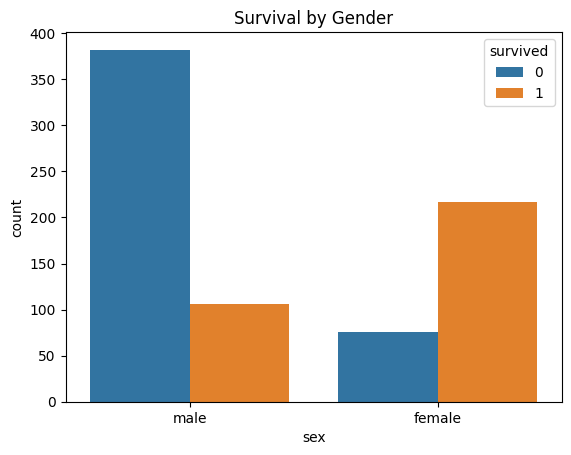

In [ ]:
#Survival Rate by Gender

import matplotlib.pyplot as plt


sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()

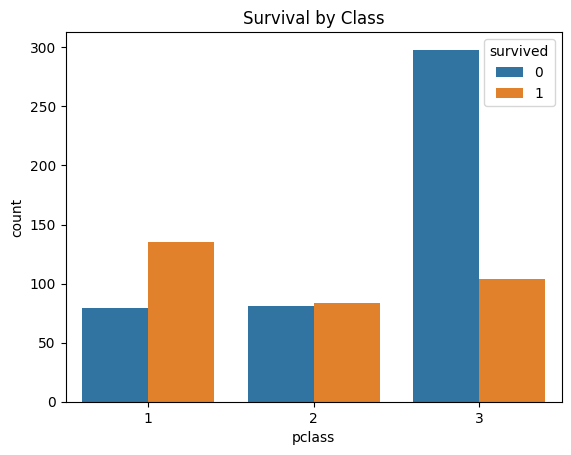

In [ ]:
# Survival Rate by Passenger Class
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival by Class')
plt.show()


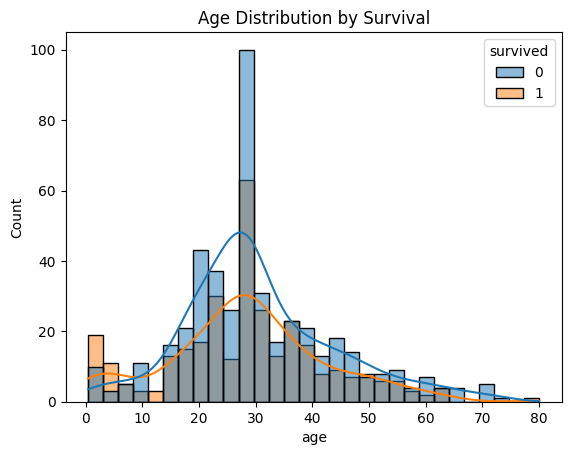

In [ ]:
#Age Distribution by Survival

sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

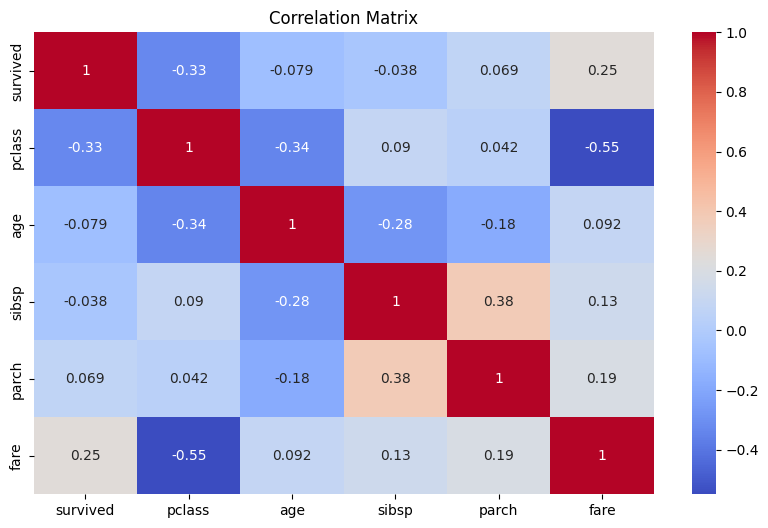

In [ ]:
#Correlation Heatmap (for numerical variables)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

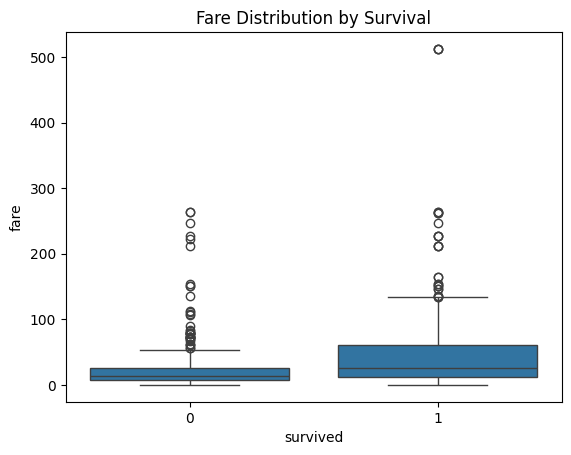

In [ ]:
#Boxplot of Fare by Survival

sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare Distribution by Survival')
plt.show()

Encode Sex

In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

Encode embarked

In [ ]:
df['embarked_Q'] = (df['embarked'] == 'Q').astype(int)
df['embarked_S'] = (df['embarked'] == 'S').astype(int)
df.drop(columns=['embarked'], inplace=True)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# For clarity, you can convert back to DataFrame
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# View scaled data
X_scaled_df.head()


,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0.888194,0.774861,-0.554151,0.481309,-0.498347,-0.526784,-0.285863,0.614349
1,-1.451367,-1.290554,0.608990,0.481309,-0.498347,0.699803,-0.285863,-1.627739
2,0.888194,-1.290554,-0.263365,-0.531904,-0.498347,-0.513854,-0.285863,0.614349
3,-1.451367,-1.290554,0.390901,0.481309,-0.498347,0.351494,-0.285863,0.614349
4,0.888194,0.774861,0.390901,-0.531904,-0.498347,-0.511460,-0.285863,0.614349


##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (624, 8)
Test shape: (157, 8)


##Logistic Regression (Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Results:\n")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Results:

[[76 16]
 [13 52]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        92
           1       0.76      0.80      0.78        65

    accuracy                           0.82       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.82      0.82      0.82       157

Accuracy: 0.8152866242038217


**True Negatives** (76)  | Model correctly predicted "didn’t survive" for 76 passengers |
**False Positives** (16) | Model predicted "survived" but they didn’t                   |
**False Negatives** (13) | Model predicted "didn’t survive" but they actually did       |
**True Positives** (52)  | Model correctly predicted survival for 52 passengers         |


## K-Means Clustering

In [ ]:
# Step 1: Select features for clustering (excluding the target 'survived')
features_for_clustering = df.drop(columns=['survived'])

# Step 2: Perform K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features_for_clustering)

# Step 3: Compare clustering labels with actual survival labels
df['kmeans_cluster'] = kmeans_labels

# Display contingency table
from sklearn.metrics import confusion_matrix
import pandas as pd

conf_matrix = confusion_matrix(df['survived'], df['kmeans_cluster'])
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Cluster 0', 'Cluster 1'])

print(conf_df)


          Cluster 0  Cluster 1
Actual 0        448         10
Actual 1        291         32


## Classification vs Clustering: Titanic Survival Prediction

### Classification: Logistic Regression
We used logistic regression, a **supervised** machine learning algorithm, to predict whether a passenger survived based on features like age, fare, sex, and passenger class. The model achieved an **accuracy of ~82%**, showing it can reliably distinguish between survivors and non-survivors using labeled data.

### 🔍 Clustering: K-Means
We also applied K-Means clustering, an **unsupervised** technique, to group passengers into two clusters without using survival labels. The results showed:
- Cluster 0 grouped most of the non-survivors.
- However, many actual survivors (291) were incorrectly grouped with non-survivors.

This demonstrates that **clustering is not ideal for tasks where the true outcome is known and discrete**. It's better suited for exploring patterns when labels are missing.

### When to Use Each:
- **Use Classification** when your goal is to **predict known labels** (like survival, spam detection, or disease diagnosis).
- **Use Clustering** when you want to **discover hidden patterns** or **group similar instances** without predefined labels (e.g., customer segmentation, anomaly detection, or document categorization).

